# Install Dependencies

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.list_physical_devices('GPU')

In [ ]:
gpus

[]

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.set_memory_growth(gpu, True)

# Load Data


In [ ]:
# tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=50, crop_to_aspect_ratio=True)

Found 1289 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
# Iterate next batch
batch = data_iterator.next()

In [ ]:
batch[0].shape

(50, 256, 256, 3)

In [ ]:
# Class 1 = Positive
# Class 0 = Negative
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1], dtype=int32)

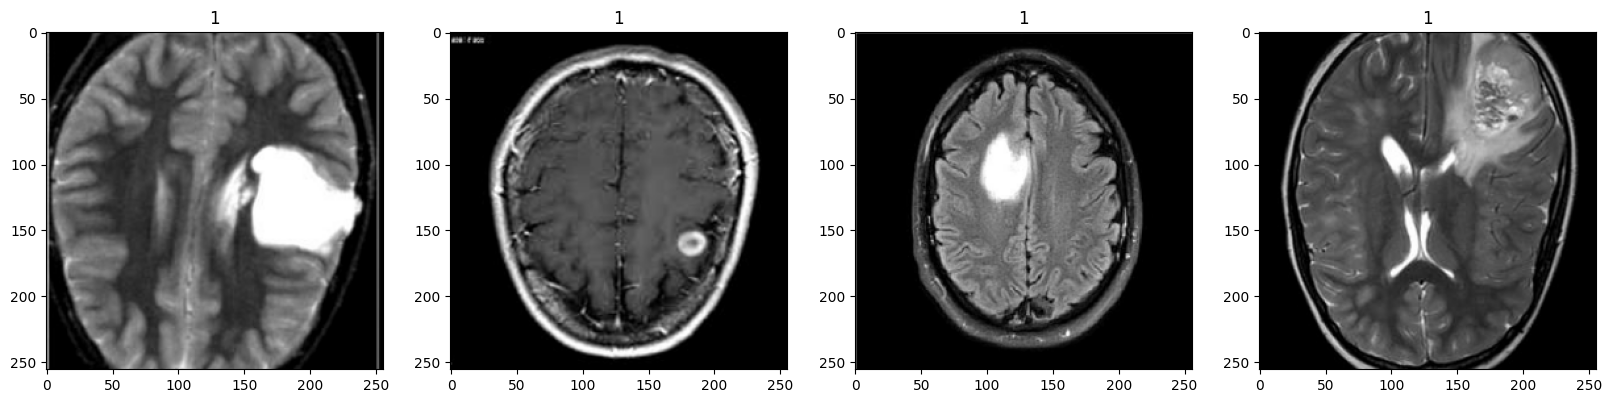

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocess

In [ ]:
# Scale to 0-1
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

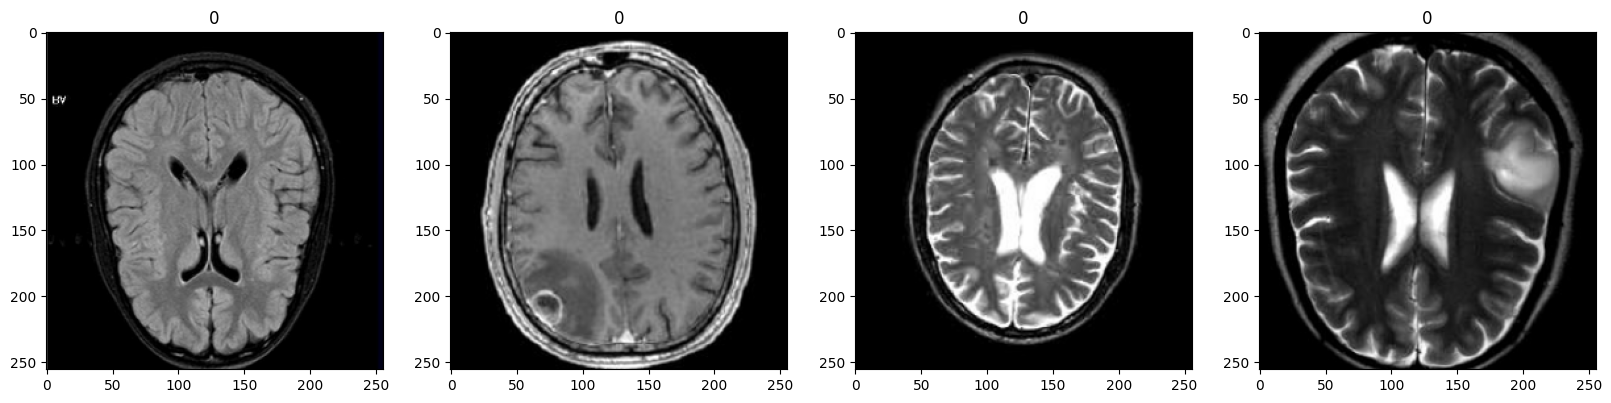

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  #print(img)
  ax[idx].imshow((img))
  ax[idx].title.set_text(batch[1][idx])

# Split Data

In [ ]:
len(data)

26

In [ ]:
train_size = int(len(data)*.7)+1 # 5
val_size = int(len(data)*.2) # 2
test_size = int(len(data)*.1)+1 # 1

In [ ]:
train_size

19

In [ ]:
val_size

5

In [ ]:
test_size

3

In [ ]:
train_size + val_size + test_size

27

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# Train

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
19/19 [==============================] - 82s 4s/step - loss: 0.6249 - accuracy: 0.6874 - val_loss: 0.4791 - val_accuracy: 0.7640
Epoch 2/15
19/19 [==============================] - 67s 3s/step - loss: 0.4065 - accuracy: 0.8063 - val_loss: 0.2581 - val_accuracy: 0.9040
Epoch 3/15
19/19 [==============================] - 75s 4s/step - loss: 0.2355 - accuracy: 0.9095 - val_loss: 0.1186 - val_accuracy: 0.9560
Epoch 4/15
19/19 [==============================] - 65s 3s/step - loss: 0.1145 - accuracy: 0.9642 - val_loss: 0.0760 - val_accuracy: 0.9840
Epoch 5/15
19/19 [==============================] - 65s 3s/step - loss: 0.0615 - accuracy: 0.9842 - val_loss: 0.1114 - val_accuracy: 0.9520
Epoch 6/15
19/19 [==============================] - 61s 3s/step - loss: 0.0400 - accuracy: 0.9916 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 7/15
19/19 [==============================] - 65s 3s/step - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 8/15
19/19 [==

# Plot Peformance

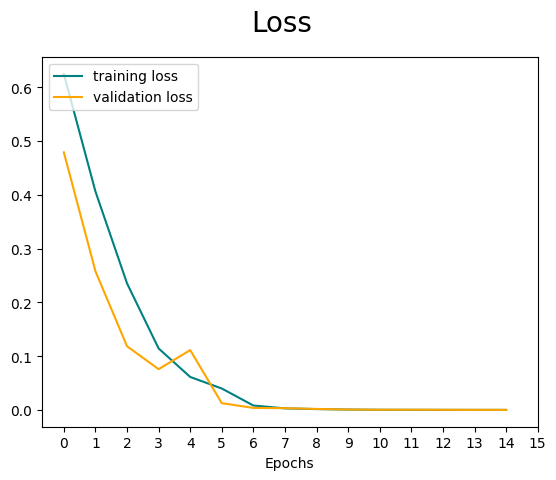

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xticks(np.arange(0, 15+1, 1.0))
plt.xlabel('Epochs')
plt.show()

In [ ]:
hist.history

{'loss': [0.6249210238456726,
  0.40645843744277954,
  0.23554514348506927,
  0.11450102925300598,
  0.06149808317422867,
  0.039982035756111145,
  0.008363527245819569,
  0.003067919285967946,
  0.0017388461856171489,
  0.000883410801179707,
  0.00046018086140975356,
  0.0003708045987877995,
  0.0003059620794374496,
  0.00027281997608952224,
  0.00019797786080744117],
 'accuracy': [0.6873683929443359,
  0.8063157796859741,
  0.9094736576080322,
  0.9642105102539062,
  0.9842105507850647,
  0.9915789365768433,
  0.9978947639465332,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.4790734648704529,
  0.25812003016471863,
  0.11862760037183762,
  0.07597636431455612,
  0.11140736937522888,
  0.01272612251341343,
  0.00394365144893527,
  0.0034437417052686214,
  0.002015146892517805,
  0.0009408107143826783,
  0.0004898789338767529,
  0.0005141996662132442,
  0.00041928718565031886,
  0.00025296444073319435,
  0.0003191710275132209],
 'val_accuracy': [0.76399999856

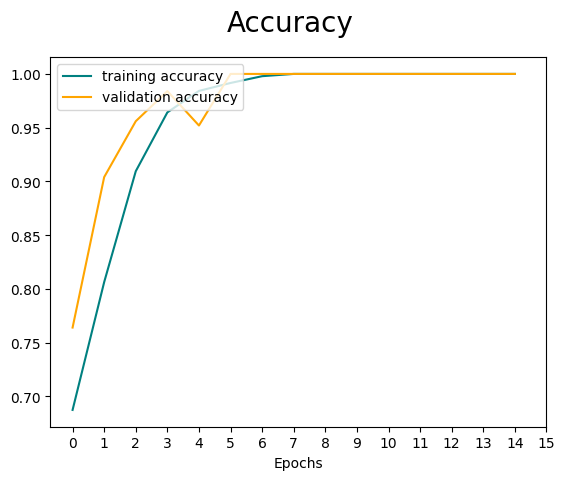

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='validation accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xticks(np.arange(0, 15+1, 1.0))
plt.xlabel('Epochs')
plt.show()

# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, AUC, \
F1Score, FalsePositives, FalseNegatives, TruePositives, TrueNegatives

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
auc = AUC()
f1 = F1Score()
fp = FalsePositives()
fn = FalseNegatives()
tp = TruePositives()
tn = TrueNegatives()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)
  auc.update_state(y, yhat)
  #f1.update_state(y, yhat)
  fp.update_state(y, yhat)
  fn.update_state(y, yhat)
  tp.update_state(y, yhat)
  tn.update_state(y, yhat)

2/2 [==============================] - 1s 94ms/step


In [ ]:
print(f'Precision: {pre.result()}')
print(f'Recall: {re.result()}')
print(f'Accuracy: {acc.result()}')
print(f'AUC: {auc.result()}')
print(f'False Positives: {fp.result()}')
print(f'False Negatives: {fn.result()}')
print(f'True Positives: {tp.result()}')
print(f'True Negatives: {tn.result()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
AUC: 1.0
False Positives: 0.0
False Negatives: 0.0
True Positives: 46.0
True Negatives: 43.0


# Test


In [ ]:
import cv2

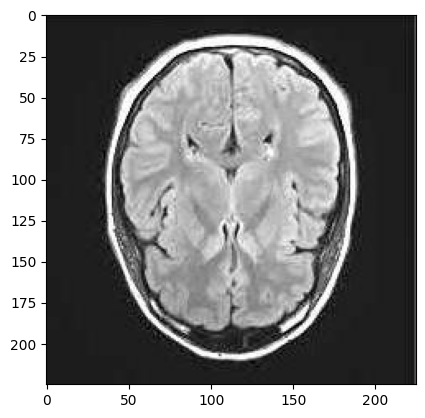

In [ ]:
img = cv2.imread('testnegative.jpg')
plt.imshow(img)
plt.show()

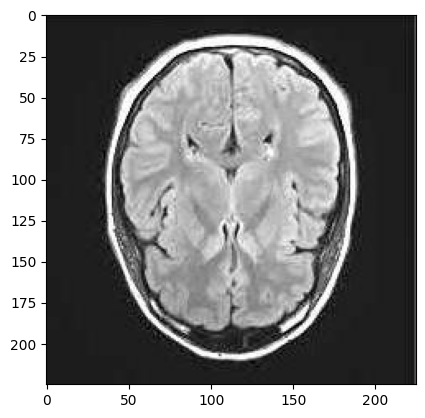

In [ ]:
img = cv2.imread('testnegative.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

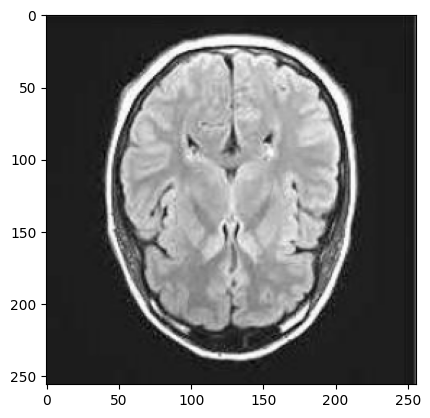

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [ ]:
yhat

array([[2.6821219e-08]], dtype=float32)

In [ ]:
if yhat < 0.5:
  print('Predicted is negative')
else:
  print('Predicted is positive')

Predicted is negative


# Saving Model


In [50]:
from tensorflow.keras.models import load_model

In [52]:
model.save(os.path.join('models','BrainTumourDetector.h5'))

In [55]:
new_model = load_model(os.path.join('models','BrainTumourDetector.h5'))

In [57]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 144ms/step


In [58]:
if yhatnew < 0.5:
  print('Predicted is negative')
else:
  print('Predicted is positive')

Predicted is negative
